# Day05: CNN

- **Team ID** : 8조

- Write and run the code below in jupyter notebook
- After completion, rename the file, and summit the file to e-class
- Submit file name : **“ML01\_<#조\>.ipynb”**, send me 김동현 <donghyunkim1217@gmail.com>
  - Ex) ML01\_#조\.ipynb
- Due : **오늘 16:59pm**

# 1. Convolutional Neural Netowks

### Image Classification with CNNs

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Load and Preprocess the Fashion-MNIST Dataset 

In [65]:
# load the fashioin_mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

In [66]:
# scaling X
X_train, X_test = X_train / 255.0, X_test / 255.0
num_classes = 10

In [67]:
# Expand dimension (Channel dim), and check shape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_train.shape

(60000, 28, 28, 1)

In [68]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

In [69]:
y_train = y_train.reshape(y_train.shape[0], 1) 
y_train.shape

(60000, 1)

In [70]:
y_test = y_test.reshape(y_test.shape[0], 1) 
y_test.shape

(10000, 1)

In [71]:
# show y_train
y_train

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

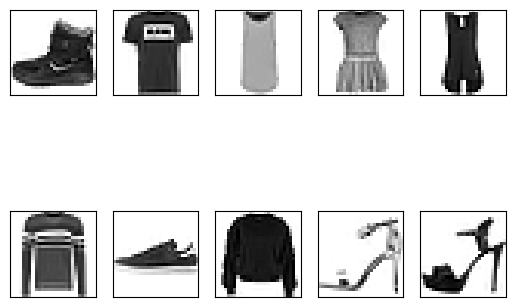

In [72]:
# show first 10 images

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

### Build the CNN model
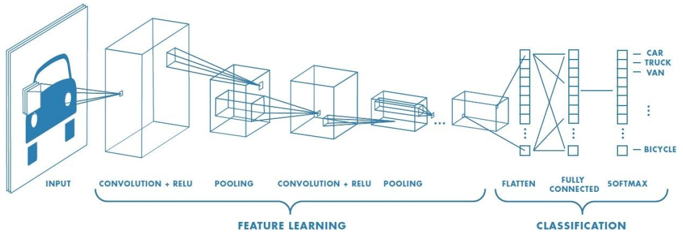

In [73]:
# CNN model with 2 convolution layers 
#    1. 32 3x3 filters, padding="same", input_shape = (28, 28, 1), activation="relu"
#    2. 64 3x3 filters, activation="relu"
# and max pooling layer with size=2
# and 2 dense layers (128, 10)
#    3. 128, activation="relu"
#    4. 10, activation="softmax"
layers = tf.keras.layers
base_model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), padding="same", input_shape = (28, 28, 1), activation="relu"),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

base_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               1384576   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

### Compile the model

In [74]:
# compile the model with loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']
base_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the model

In [75]:
# train the CNN model with X_train, y_train, 10 epochs, validation_data=(X_test, y_test)
base_history = base_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
   6/1875 [..............................] - ETA: 20s - loss: 2.0892 - accuracy: 0.2969 

2023-07-11 14:47:02.092187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.3497 - accuracy: 0.8750

2023-07-11 14:47:22.957847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 23s 12ms/step - loss: 0.3497 - accuracy: 0.8750 - val_loss: 0.2639 - val_accuracy: 0.9065
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2139 - accuracy: 0.9219 - val_loss: 0.2686 - val_accuracy: 0.8983
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1599 - accuracy: 0.9410 - val_loss: 0.2270 - val_accuracy: 0.9200
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1189 - accuracy: 0.9564 - val_loss: 0.2406 - val_accuracy: 0.9231
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0841 - accuracy: 0.9693 - val_loss: 0.2697 - val_accuracy: 0.9189
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0604 - accuracy: 0.9785 - val_loss: 0.2845 - val_accuracy: 0.9235
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0428 - accuracy: 0.9845 - val_loss: 0.3526 - val_accura

### Plot the loss

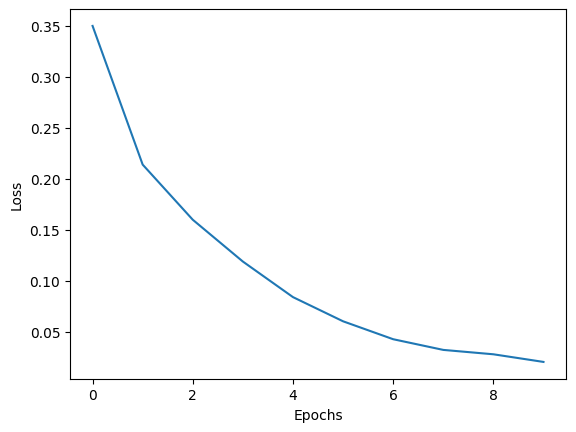

In [76]:
# plot the loss. use history.history['loss']
plt.plot(base_history.epoch, base_history.history['loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Evaluate the base model

In [77]:
# Train and test accuracy. use evaluate()

loss, acc = base_model.evaluate(X_train, y_train)
print('Train accuracy : %.4f' % acc)
loss, acc = base_model.evaluate(X_test, y_test)
print('Test accuracy : %.4f' % acc)

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0145 - accuracy: 0.9947
Train accuracy : 0.9947
313/313 [==============================] - 3s 8ms/step - loss: 0.4599 - accuracy: 0.9230
Test accuracy : 0.9230


### The model with dropout regularization
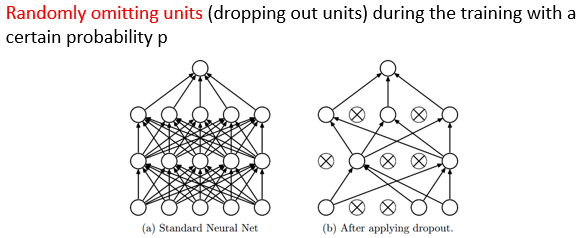

In [78]:
# Base CNN model + dropout with 0.5 before the last layer
dropout_model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), padding="same", input_shape = (28, 28, 1), activation="relu"),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),  # Dropout layer with a dropout rate of 0.5
    layers.Dense(10, activation="softmax")
])

dropout_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1384576   
                                                                 


 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,404,682
Trainable params: 1,404,682
Non-trainable params: 0
_________________________________________________________________


### Compile the dropout model

In [79]:
# compile the model
dropout_model.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

### Train the dropout model

In [80]:
# train the dropout model with X_train, y_train, 10 epochs, validation_data=(X_test, y_test)
drop_history = dropout_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
   5/1875 [..............................] - ETA: 23s - loss: 2.2648 - accuracy: 0.1875 

2023-07-11 14:51:05.028288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1870/1875 [============================>.] - ETA: 0s - loss: 0.4242 - accuracy: 0.8511

2023-07-11 14:51:24.776683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 22s 12ms/step - loss: 0.4242 - accuracy: 0.8512 - val_loss: 0.2956 - val_accuracy: 0.8932
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2686 - accuracy: 0.9037 - val_loss: 0.2553 - val_accuracy: 0.9068
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2182 - accuracy: 0.9206 - val_loss: 0.2382 - val_accuracy: 0.9120
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1862 - accuracy: 0.9313 - val_loss: 0.2367 - val_accuracy: 0.9138
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1621 - accuracy: 0.9397 - val_loss: 0.2115 - val_accuracy: 0.9241
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1372 - accuracy: 0.9494 - val_loss: 0.2450 - val_accuracy: 0.9120
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1187 - accuracy: 0.9565 - val_loss: 0.2259 - val_accura

### Plot the loss

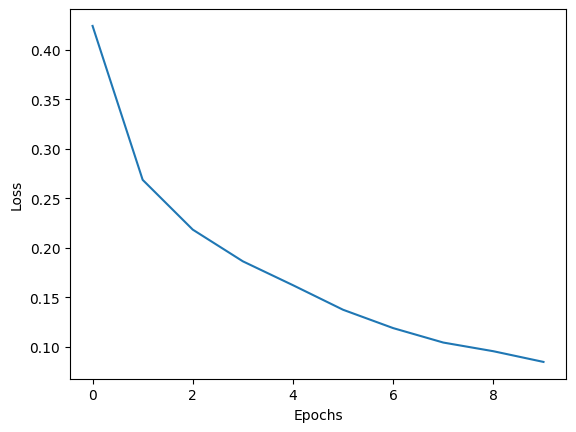

In [81]:
# plot the loss. use history.history['loss']
plt.plot(drop_history.epoch, drop_history.history['loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Evaluate the dropout model

In [82]:
# Train and test accuracy. use evaluate()
loss, acc = dropout_model.evaluate(X_train, y_train)
print('Train accuracy : %.4f' % acc)
loss, acc = dropout_model.evaluate(X_test, y_test)
print('Test accuracy : %.4f' % acc)

1875/1875 [==============================] - 16s 9ms/step - loss: 0.0464 - accuracy: 0.9838
Train accuracy : 0.9838
313/313 [==============================] - 3s 8ms/step - loss: 0.2947 - accuracy: 0.9244
Test accuracy : 0.9244


### Plotting the learning curves

(0.0, 9.0)

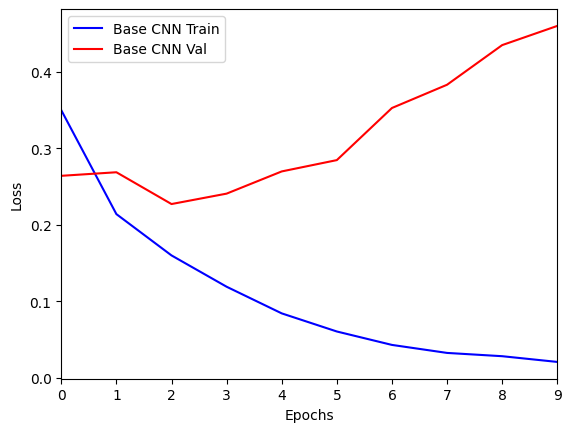

In [83]:
# plot the train/validation losses for each model
plt.plot(base_history.epoch, base_history.history['loss'], color='blue', label='Base CNN Train')
plt.plot(base_history.epoch, base_history.history['val_loss'], color='red', label='Base CNN Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim([0,max(base_history.epoch)])

(0.0, 9.0)

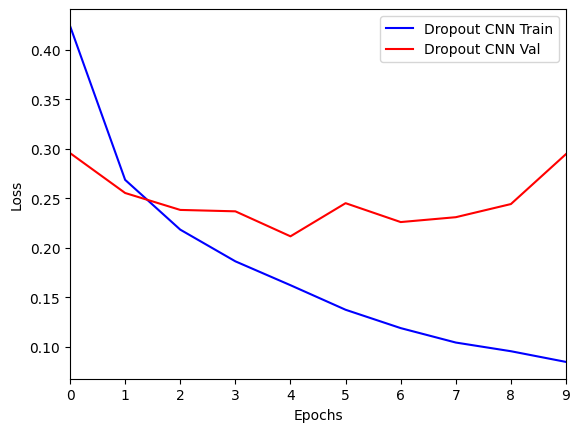

In [84]:
# plot the train/validation losses for each model
plt.plot(drop_history.epoch, drop_history.history['loss'], color='blue', label='Dropout CNN Train')
plt.plot(drop_history.epoch, drop_history.history['val_loss'], color='red', label='Dropout CNN Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim([0,max(drop_history.epoch)])

---

# 2. Dealing with missing data

### Sample data

In [85]:
import pandas as pd
import numpy as np

df = pd.read_csv('sample-missing-data.csv')
df

,A,B,C,label
0,1,0.1,10.0,0
1,2,0.2,20.0,0
2,2,0.1,NaN,1
3,3,0.3,20.0,1
4,2,0.2,NaN,0


In [86]:
#check if there are missing values. use .isnull() and .sum()
df.isnull().sum()

A        0
B        0
C        2
label    0
dtype: int64

### Removing a feature

In [87]:
# remove feature 'C'. use .drop()
df.drop('C', axis=1)

,A,B,label
0,1,0.1,0
1,2,0.2,0
2,2,0.1,1
3,3,0.3,1
4,2,0.2,0


### Removing data with missing values

In [88]:
# remove rows that contain missing values. use .dropna()
df.dropna(axis=0)

,A,B,C,label
0,1,0.1,10.0,0
1,2,0.2,20.0,0
3,3,0.3,20.0,1


In [89]:
# remove colomns that contain missing values. use .dropna()
df.dropna(axis=1)

,A,B,label
0,1,0.1,0
1,2,0.2,0
2,2,0.1,1
3,3,0.3,1
4,2,0.2,0


### Imputing missing values 

In [90]:
# Impute missing values to mean. use .fillna()
df.fillna(df.mean())

,A,B,C,label
0,1,0.1,10.000000,0
1,2,0.2,20.000000,0
2,2,0.1,16.666667,1
3,3,0.3,20.000000,1
4,2,0.2,16.666667,0


### Imputing missing values using scikit learn

In [91]:
# get X array from df dataframe
X = df.values
print(X)

[[ 1.   0.1 10.   0. ]
 [ 2.   0.2 20.   0. ]
 [ 2.   0.1  nan  1. ]
 [ 3.   0.3 20.   1. ]
 [ 2.   0.2  nan  0. ]]


In [92]:
from sklearn.impute import SimpleImputer

# replace missing values, encoded as np.nan, using the mean value of the columns
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr.fit(X)

imputed_X = imr.transform(X)
print(imputed_X)

[[ 1.          0.1        10.          0.        ]
 [ 2.          0.2        20.          0.        ]
 [ 2.          0.1        16.66666667  1.        ]
 [ 3.          0.3        20.          1.        ]
 [ 2.          0.2        16.66666667  0.        ]]


---

# 2. Handling categorical feature values

### Sample data 
- color : norminal
- size : ordinal  

In [93]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class3'],
                   ['red', 'M', 14.5, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class1
2,blue,XL,15.3,class3
3,red,M,14.5,class2


In [94]:
pdf = df.copy()   # for pandas
sdf = df.copy()   # for scikit learn

### Encoding class labels 

In [95]:
# Label encoding using pandas. use .map()
label_mapping = {'class1': 0, 'class2': 1, 'class3': 2 }

pdf['classlabel'] = pdf['classlabel'].map(label_mapping)
pdf

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,0
2,blue,XL,15.3,2
3,red,M,14.5,1


In [96]:
from sklearn.preprocessing import LabelEncoder

# Label encoding using scikit learn. use LabelEncoder
enc = LabelEncoder()

sdf['classlabel'] = enc.fit_transform(sdf['classlabel'])
sdf

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,0
2,blue,XL,15.3,2
3,red,M,14.5,1


### Encoding feature values 

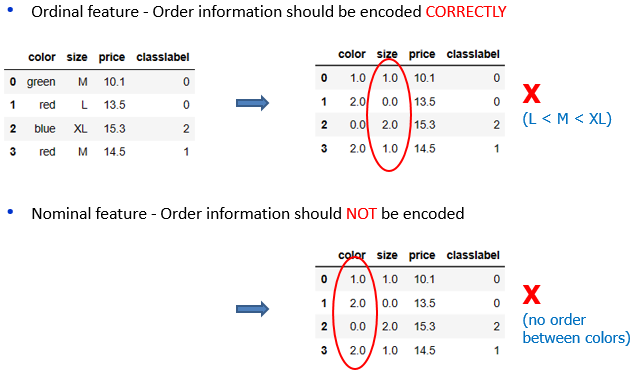

### Encoding ordinal features 

In [97]:
# encoding ordinal features using pandas
size_mapping = {'M': 0, 'L': 1, 'XL': 2 }

pdf['size'] = pdf['size'].map(size_mapping)
pdf

,color,size,price,classlabel
0,green,0,10.1,0
1,red,1,13.5,0
2,blue,2,15.3,2
3,red,0,14.5,1


In [98]:
from sklearn.preprocessing import OrdinalEncoder

# encoding ordinal features  scikit learn. use OrdinalEncoder
enc = OrdinalEncoder(categories=[['M', 'L', 'XL']])

sdf[['size']] = enc.fit_transform(sdf[['size']])
sdf

,color,size,price,classlabel
0,green,0.0,10.1,0
1,red,1.0,13.5,0
2,blue,2.0,15.3,2
3,red,0.0,14.5,1


### One-hot encoding of nominal features

In [99]:
# one-hot encoding 'color' using pandas. use get_dummies()
pd.get_dummies(pdf, columns=['color'])

,size,price,classlabel,color_blue,color_green,color_red
0,0,10.1,0,False,True,False
1,1,13.5,0,False,False,True
2,2,15.3,2,True,False,False
3,0,14.5,1,False,False,True


In [100]:
from sklearn.preprocessing import OneHotEncoder

# one-hot encoding 'color' using scikit learn. use OneHotEncoder
enc = OneHotEncoder(sparse_output=False)

color_enc = enc.fit_transform(sdf[['color']])
print(color_enc)

# remake the data frame. use .concat()
sdf_color_enc = pd.DataFrame(color_enc, columns=['color0', 'color1', 'color2'])
sdf = pd.concat([sdf_color_enc, sdf[['size', 'price', 'classlabel']]], axis=1)
sdf

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


,color0,color1,color2,size,price,classlabel
0,0.0,1.0,0.0,0.0,10.1,0
1,0.0,0.0,1.0,1.0,13.5,0
2,1.0,0.0,0.0,2.0,15.3,2
3,0.0,0.0,1.0,0.0,14.5,1


---

# 3. Transformation of numerical feature values

### Loading Wine Dataset

In [101]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Get X and y. Splitting data into 70% training, 30% test 

In [102]:
from sklearn.model_selection import train_test_split

# Get X and y. use .iloc[ , ]. Class label is at column 0
X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values

# Get training and test data. use train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=0, stratify=y)

In [103]:
print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


### Normalization
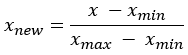

In [104]:
from sklearn.preprocessing import MinMaxScaler

# transform training and test data to min 0, max 1. use MinMaxScaler()
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [105]:
# check normalized data
print(X_train[0:3, 0:5])
print(X_train_norm[0:3, 0:5])

[[ 13.62   4.95   2.35  20.    92.  ]
 [ 13.76   1.53   2.7   19.5  132.  ]
 [ 13.73   1.5    2.7   22.5  101.  ]]
[[0.64619883 0.83201581 0.4248366  0.46236559 0.27160494]
 [0.6871345  0.15612648 0.65359477 0.43548387 0.7654321 ]
 [0.67836257 0.15019763 0.65359477 0.59677419 0.38271605]]


### Standardization
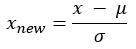

In [106]:
from sklearn.preprocessing import StandardScaler

# transform training and test data to mean 0, variance 1
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [107]:
# check standardized data
print(X_train[0:3, 0:5])
print('mean[0] = %.2f \n' % X_train[:,0].mean())
print(X_train_std[0:3, 0:5])
print('mean[0] = %.2f \n' % X_train_std[:,0].mean())

[[ 13.62   4.95   2.35  20.    92.  ]
 [ 13.76   1.53   2.7   19.5  132.  ]
 [ 13.73   1.5    2.7   22.5  101.  ]]
mean[0] = 13.03 

[[ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733]
 [ 0.88229214 -0.70457155  1.17533605 -0.09065504  2.34147876]
 [ 0.84585645 -0.73022996  1.17533605  0.81104754  0.13597904]]
mean[0] = 0.00 

